Reading data from CSV, data analysis, cleaning and transofrming to numeric form

In [1]:
#import bibliotek
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [3]:
data = pd.read_csv("LionsDen.csv", sep=";", decimal = ",")

Data analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79155 entries, 0 to 79154
Data columns (total 50 columns):
CUSTOMER_ID                      79155 non-null int64
APPLICATION_ID                   79155 non-null float64
DEFAULT_FLAG                     79155 non-null int64
APPLICATION_DATE                 79155 non-null object
APPLICATION_HOUR                 79155 non-null object
APPLICATION_WEEKDAY              79155 non-null int64
APPLICATION_MONTH                79155 non-null int64
APPLICATION_YEAR                 79155 non-null int64
PRODUCT_GROUP                    79155 non-null object
LOAN_PERIOD                      79155 non-null int64
CREDIT_AMOUNT                    79155 non-null int64
CUSTOMER_TYPE                    79155 non-null object
COOP_PERIOD                      79155 non-null int64
CREDIT_COOP_PERIOD               79155 non-null int64
AGE                              79155 non-null int64
AGE_BANDS                        79155 non-null object
EDUCATION           

In [5]:
null_counts = data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
CUSTOMER_ID                          0
APPLICATION_ID                       0
DEFAULT_FLAG                         0
APPLICATION_DATE                     0
APPLICATION_HOUR                     0
APPLICATION_WEEKDAY                  0
APPLICATION_MONTH                    0
APPLICATION_YEAR                     0
PRODUCT_GROUP                        0
LOAN_PERIOD                          0
CREDIT_AMOUNT                        0
CUSTOMER_TYPE                        0
COOP_PERIOD                          0
CREDIT_COOP_PERIOD                   0
AGE                                  0
AGE_BANDS                            0
EDUCATION                            0
MARITAL_STATUS                       0
SPOUSE_PROPERTY_STATUS               0
OWNERSHIP                            0
NUMBER_OF_FAMILY_MEMBERS             0
MAIL_ADDR_SAME_AS_RESIDENTIAL        0
EMAIL_DOMAIN                         0
EMAIL_NAME_SURNAME                   0
MARKETING_CONSENT         

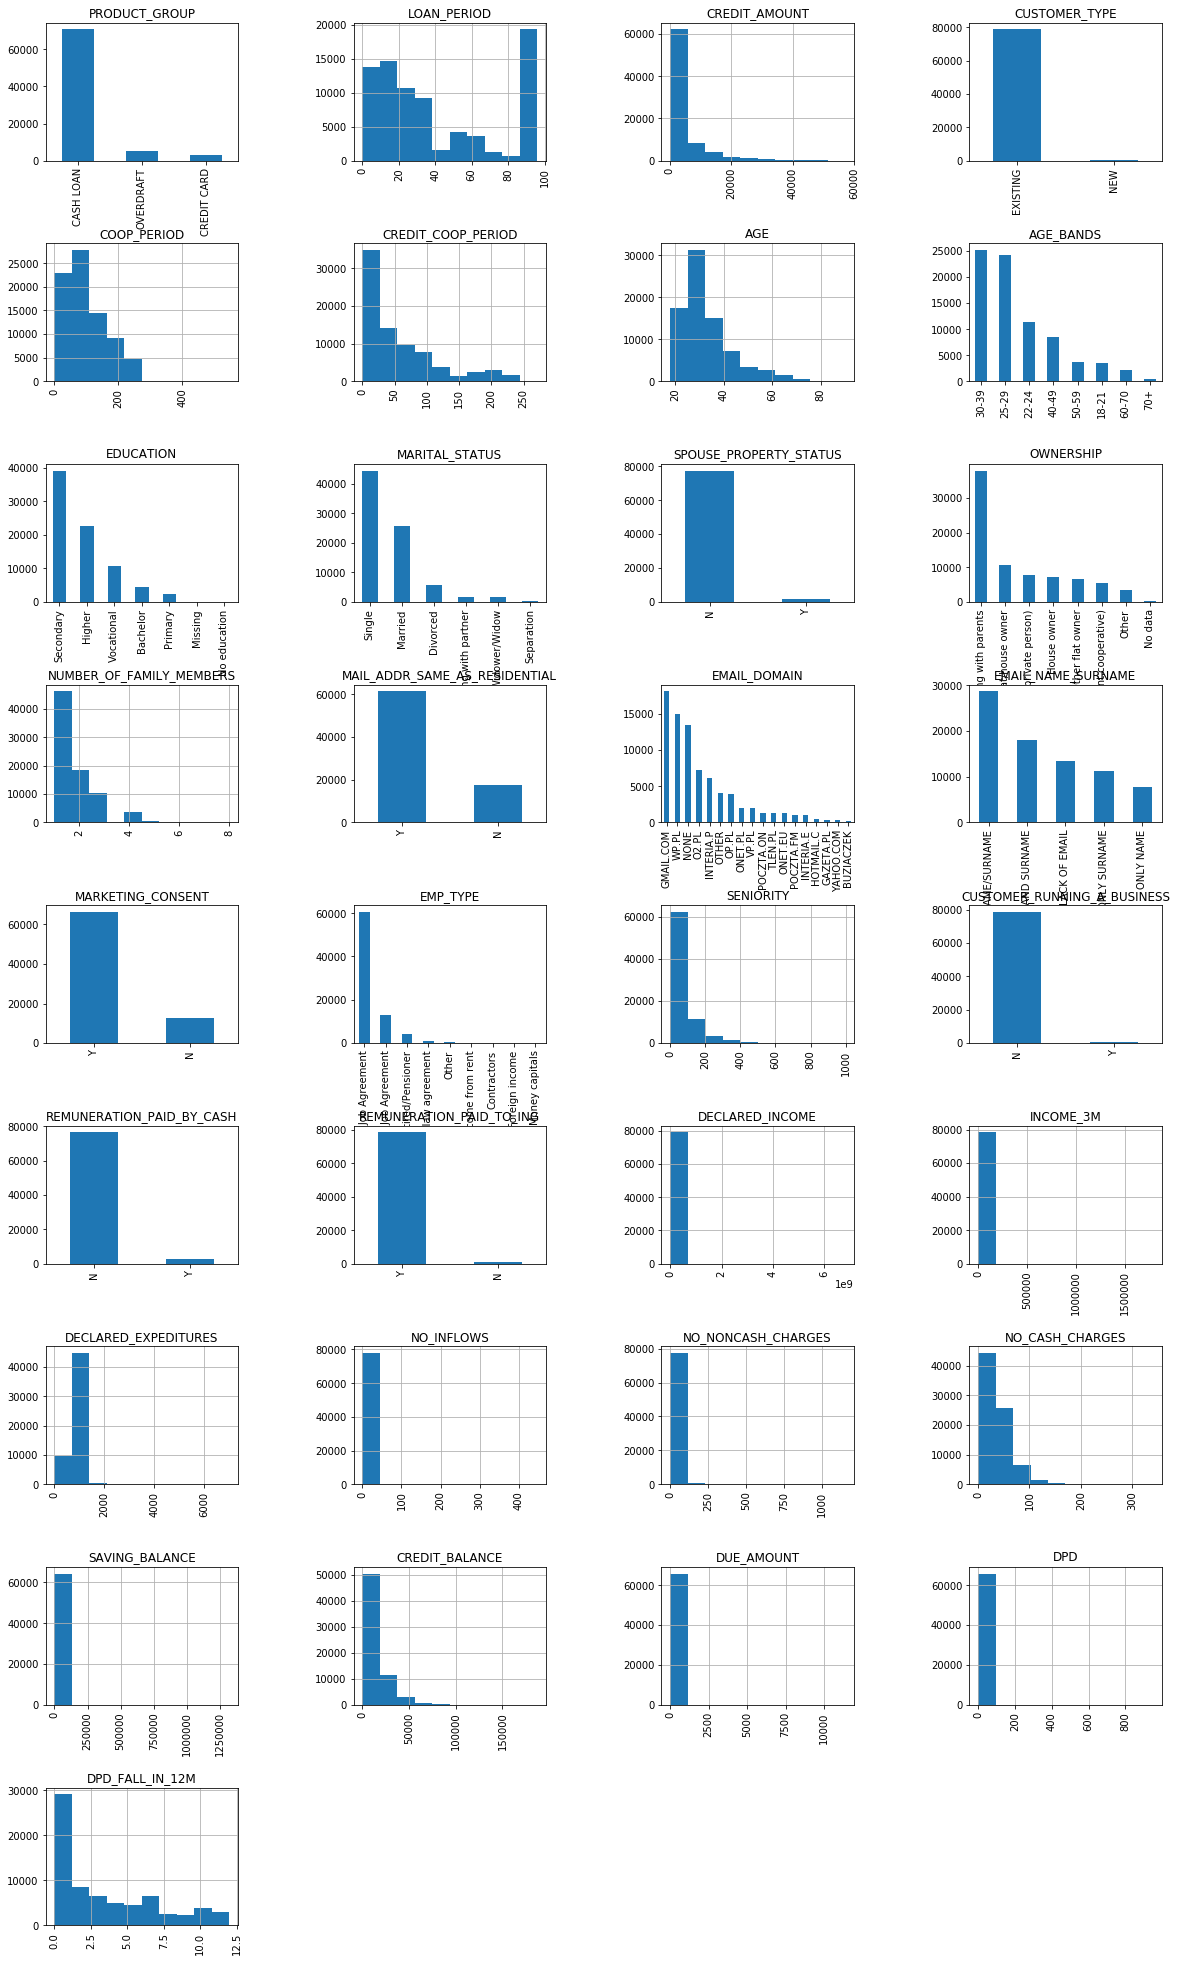

In [6]:
data_to_plot = data[[
 'PRODUCT_GROUP',
 'LOAN_PERIOD',
 'CREDIT_AMOUNT',
 'CUSTOMER_TYPE',
 'COOP_PERIOD',
 'CREDIT_COOP_PERIOD',
 'AGE',
 'AGE_BANDS',
 'EDUCATION',
 'MARITAL_STATUS',
 'SPOUSE_PROPERTY_STATUS',
 'OWNERSHIP',
 'NUMBER_OF_FAMILY_MEMBERS',
 'MAIL_ADDR_SAME_AS_RESIDENTIAL',
 'EMAIL_DOMAIN',
 'EMAIL_NAME_SURNAME',
 'MARKETING_CONSENT',
 'EMP_TYPE',
 'SENIORITY',
 'CUSTOMER_RUNNING_A_BUSINESS',
 'REMUNERATION_PAID_BY_CASH',
 'REMUNERATION_PAID_TO_ING',
 'DECLARED_INCOME',
 'INCOME_3M',
 'DECLARED_EXPEDITURES',
 'NO_INFLOWS',
 'NO_NONCASH_CHARGES',
 'NO_CASH_CHARGES',
 'SAVING_BALANCE',
 'CREDIT_BALANCE',
 'DUE_AMOUNT',
 'DPD',
 'DPD_FALL_IN_12M']]

fig=plt.figure(figsize=(20,35))
col=4
rows=math.ceil(float(data_to_plot.shape[1])/col)
for i, column in enumerate(data_to_plot.columns):
    ax=fig.add_subplot(rows,col, i+1)
    ax.set_title(column)
    if data_to_plot.dtypes[column]==np.object:
        data_to_plot[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_to_plot[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.6,wspace=0.6)

In [7]:
data_numerical = data[["INCOME_3M", "DECLARED_INCOME", "SAVING_BALANCE", "DECLARED_EXPEDITURES",
                      "CREDIT_BALANCE", "DUE_AMOUNT", "NO_NONCASH_CHARGES", "NO_CASH_CHARGES"]]
pd.options.display.float_format = "{:.2f}".format
data_numerical.describe()

,INCOME_3M,DECLARED_INCOME,SAVING_BALANCE,DECLARED_EXPEDITURES,CREDIT_BALANCE,DUE_AMOUNT,NO_NONCASH_CHARGES,NO_CASH_CHARGES
count,78384.00,79155.00,64496.00,54563.00,65876.00,65876.00,78384.00,78384.00
mean,8288.96,91034.33,2133.99,851.90,12404.07,7.04,22.78,35.13
std,12351.02,24181305.56,13767.83,265.17,14052.93,72.58,24.88,26.12
min,100.00,860.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3600.00,2150.00,0.00,705.91,2470.00,0.00,9.00,16.00
50%,5600.00,2680.00,0.00,940.00,7400.00,0.00,14.00,30.00
75%,9200.00,3490.00,300.00,983.00,17670.00,0.00,26.00,48.00
max,1781100.00,6802954260.00,1320900.00,7000.00,187260.00,11370.00,1151.00,340.00


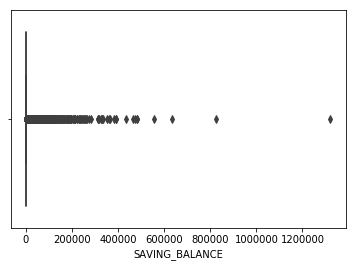

In [8]:
sns.boxplot(x=data['SAVING_BALANCE'])

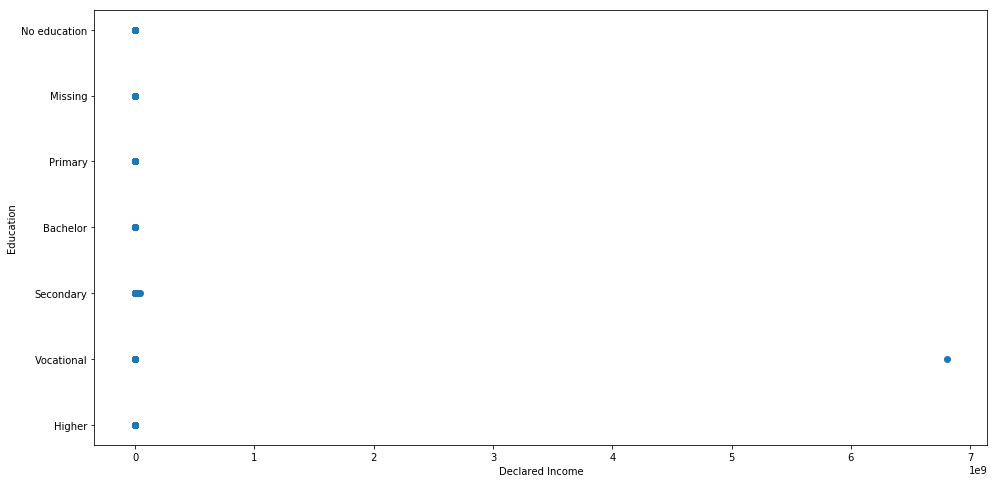

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['DECLARED_INCOME'], data['EDUCATION'])
ax.set_xlabel('Declared Income')
ax.set_ylabel('Education')
plt.show()

Removing outliers

In [10]:
def remove_outlier(data_1, col_name):
    
    mean_1 = np.mean(data_1[col_name])
    std_1 =np.std(data_1[col_name])
    
    df_out = data_1.drop(data_1[((data_1[col_name] - 
                        mean_1) / std_1).abs() > 3].index)

    return df_out

In [11]:
data = remove_outlier(data, 'SAVING_BALANCE')

In [12]:
data = remove_outlier(data, "DECLARED_INCOME")

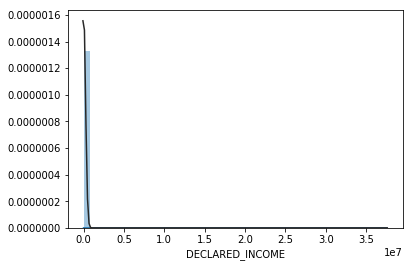

In [13]:
sns.distplot(data['DECLARED_INCOME'], fit=stats.norm)

In [14]:
data['DECLARED_INCOME']=np.log(data['DECLARED_INCOME'])

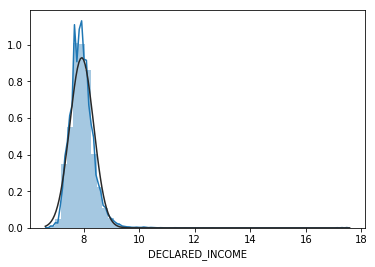

In [15]:
sns.distplot(data['DECLARED_INCOME'], fit=stats.norm)

Filling missing data

Based on data description, there are applied two ways of filling missing data:
1. with mean, when NaN in data means that there is no availale information (like Saving_balance, where NaN means that client do not have saving account in ING, but it does not mean that the client has no savings)
2. with zeros, when NaN in data means actual lack of particular feature (like NaN  in BIK_ACC_NUM_TOTAL_CLOSE means the client has no history in BIK)

In [16]:
list_average = ['DECLARED_INCOME', 'SAVING_BALANCE', 'NO_INFLOWS', 'INCOME_3M', 'DECLARED_EXPEDITURES',
               'CREDIT_BALANCE', 'NO_NONCASH_CHARGES', 'NO_CASH_CHARGES', 'CREDIT_BALANCE_TO_LIMIT']

for column in list_average:
    data[column] = data[column].fillna(data[column].mean())

In [17]:
list_zeros = ['DUE_AMOUNT', 'DPD', 'DPD_FALL_IN_12M', 'BIK_ACC_NUM_TOTAL_CLOSE',
             'BIK_ACC_NUM_TOTAL_OPEN', 'BIK_BAL_TOTAL_OPEN', 'BIK_OVERDUE_12M_TOTAL_MAX',
             'BIK_OVERDUE_EVER_TOTAL_MAX']

for column in list_zeros:
    data[column] = data[column].fillna(0)

In [18]:
null_counts = data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
CUSTOMER_ID                      0
APPLICATION_ID                   0
DEFAULT_FLAG                     0
APPLICATION_DATE                 0
APPLICATION_HOUR                 0
APPLICATION_WEEKDAY              0
APPLICATION_MONTH                0
APPLICATION_YEAR                 0
PRODUCT_GROUP                    0
LOAN_PERIOD                      0
CREDIT_AMOUNT                    0
CUSTOMER_TYPE                    0
COOP_PERIOD                      0
CREDIT_COOP_PERIOD               0
AGE                              0
AGE_BANDS                        0
EDUCATION                        0
MARITAL_STATUS                   0
SPOUSE_PROPERTY_STATUS           0
OWNERSHIP                        0
NUMBER_OF_FAMILY_MEMBERS         0
MAIL_ADDR_SAME_AS_RESIDENTIAL    0
EMAIL_DOMAIN                     0
EMAIL_NAME_SURNAME               0
MARKETING_CONSENT                0
EMP_TYPE                         0
SENIORITY                        0
CUSTOMER_RUNNING_

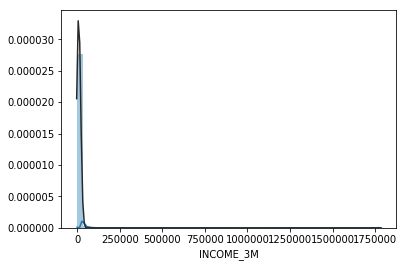

In [19]:
sns.distplot(data['INCOME_3M'], fit=stats.norm)

In [20]:
data['INCOME_3M']=np.log(data['INCOME_3M'])

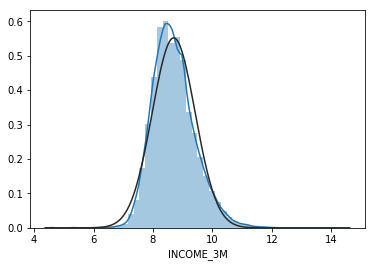

In [21]:
sns.distplot(data['INCOME_3M'], fit=stats.norm)

Transforming data into numerical form

In [22]:
data.EMAIL_NAME_SURNAME.value_counts()/data.shape[0]

LACK OF NAME/SURNAME   0.36
NAME AND SURNAME       0.23
LACK OF EMAIL          0.17
ONLY SURNAME           0.14
ONLY NAME              0.10
Name: EMAIL_NAME_SURNAME, dtype: float64

In [23]:
EMAIL_NAME_SURNAME_dict= {
        'LACK OF NAME/SURNAME': 0,
        'NAME AND SURNAME': 1,
        'LACK OF EMAIL': 0,
        'ONLY SURNAME': 1,
        'ONLY NAME': 1,
    }
data['EMAIL_NAME_SURNAME_after_dict'] = data['EMAIL_NAME_SURNAME'].map(EMAIL_NAME_SURNAME_dict)

In [24]:
data.EMP_TYPE.value_counts()/data.shape[0]

Permanent Job Agreement   0.77
Term Job Agreement        0.16
Retired/Pensioner         0.05
Civil law agreement       0.01
Other                     0.00
Income from rent          0.00
Contractors               0.00
Foreign income            0.00
Money capitals            0.00
Name: EMP_TYPE, dtype: float64

In [25]:
data['EMP_TYPE_code'] = np.where(data['EMP_TYPE'].str.contains('Permanent Job Agreement'), 1, 0)

In [26]:
data.EMAIL_DOMAIN.value_counts()/data.shape[0] #two domains with higher frequency will be kept, other
                                               #assign to "other"

GMAIL.COM   0.23
WP.PL       0.19
NONE        0.17
O2.PL       0.09
INTERIA.P   0.08
OTHER       0.05
OP.PL       0.05
ONET.PL     0.03
VP.PL       0.02
TLEN.PL     0.02
POCZTA.ON   0.02
ONET.EU     0.02
POCZTA.FM   0.01
INTERIA.E   0.01
HOTMAIL.C   0.01
GAZETA.PL   0.00
YAHOO.COM   0.00
BUZIACZEK   0.00
Name: EMAIL_DOMAIN, dtype: float64

In [27]:
EMAIL_DOMAIN_dict= {
        'GMAIL.COM': 'GMAIL',
        'WP.PL': 'WP',
    }
data['EMAIL_DOMAIN_after_dict'] = data['EMAIL_DOMAIN'].map(EMAIL_DOMAIN_dict)
data['EMAIL_DOMAIN_after_dict'] = data['EMAIL_DOMAIN_after_dict'].fillna("other")

In [28]:
data.MARITAL_STATUS.value_counts()/data.shape[0]

Single                0.56
Married               0.32
Divorced              0.07
Living with partner   0.02
Widower/Widow         0.02
Separation            0.00
Name: MARITAL_STATUS, dtype: float64

In [29]:
#all singles get 0
MARITAL_STATUS_dict= {
        'Single': 0,
        'Married': 1,
        'Divorced': 0,
        'Living with partner': 1,
        'Widower/Widow': 0,
        'Separation': 0,
    }
data['MARITAL_STATUS_after_dict'] = data['MARITAL_STATUS'].map(MARITAL_STATUS_dict)

In [30]:
data.BIK_GRP.value_counts()/data.shape[0]

CREDIT HISTORY (FULL DATA)    0.85
CREDIT HISTORY  (PART DATA)   0.08
NO CREDIT HISTORY             0.06
Name: BIK_GRP, dtype: float64

In [31]:
#all singles get 0
BIK_GRP_dict= {
        'CREDIT HISTORY (FULL DATA)': 1,
        'CREDIT HISTORY  (PART DATA)': 0,
        'NO CREDIT HISTORY': 0,
    }
data['BIK_GRP_after_dict'] = data['BIK_GRP'].map(BIK_GRP_dict)

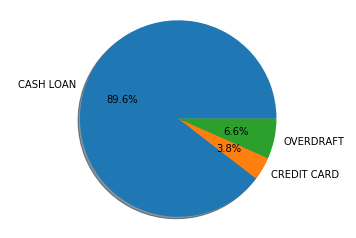

In [32]:
labels = data['PRODUCT_GROUP'].astype('category').cat.categories.tolist()
counts = data['PRODUCT_GROUP'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [33]:
#overdrafts and credit cards have similar characteristic and from the risk management perpescive 
#are the same products, so they are agrregated together

data['cl_code'] = np.where(data['PRODUCT_GROUP'].str.contains('CASH LOAN'), 1, 0)

Text(0.5, 0, 'EDUCATION')

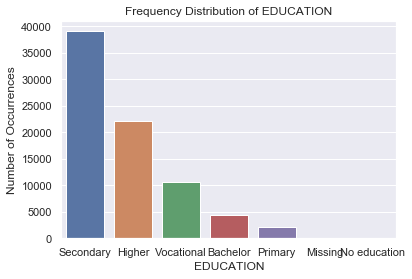

In [34]:
EDUCATION = data['EDUCATION'].value_counts()
sns.set(style="darkgrid")
sns.barplot(EDUCATION.index, EDUCATION.values)
plt.title('Frequency Distribution of EDUCATION')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('EDUCATION', fontsize=12)

In [35]:
#The wages are assigned to education level
Education_dict= {
        'Secondary': 2,
        'Higher': 3,
        'Vocational': 2,
        'Bachelor': 3,
        'Primary': 1,
        'Missing': 0,
        'No education': 0,
    }
data['education_code'] = data['EDUCATION'].map(Education_dict)

In [37]:
# LabelEncoder is used for field where only two possible values occure
list_LE = ['CUSTOMER_TYPE', 'SPOUSE_PROPERTY_STATUS', 'MAIL_ADDR_SAME_AS_RESIDENTIAL',
          'MARKETING_CONSENT', 'CUSTOMER_RUNNING_A_BUSINESS', 'REMUNERATION_PAID_BY_CASH',
          'REMUNERATION_PAID_TO_ING']

lb_make = LabelEncoder()

for column in list_LE:
    data[column + '_code'] = lb_make.fit_transform(data[column])

In [38]:
# get_dummies is used for columns where there are more than two possible values 
list_GD = ['OWNERSHIP', 'EMAIL_DOMAIN_after_dict']

for column in list_GD:
    data = pd.get_dummies(data, columns=[column], prefix = [column])

In [39]:
data.head()

,CUSTOMER_ID,APPLICATION_ID,DEFAULT_FLAG,APPLICATION_DATE,APPLICATION_HOUR,APPLICATION_WEEKDAY,APPLICATION_MONTH,APPLICATION_YEAR,PRODUCT_GROUP,LOAN_PERIOD,CREDIT_AMOUNT,CUSTOMER_TYPE,COOP_PERIOD,CREDIT_COOP_PERIOD,AGE,AGE_BANDS,EDUCATION,MARITAL_STATUS,SPOUSE_PROPERTY_STATUS,NUMBER_OF_FAMILY_MEMBERS,MAIL_ADDR_SAME_AS_RESIDENTIAL,EMAIL_DOMAIN,EMAIL_NAME_SURNAME,MARKETING_CONSENT,EMP_TYPE,SENIORITY,CUSTOMER_RUNNING_A_BUSINESS,REMUNERATION_PAID_BY_CASH,REMUNERATION_PAID_TO_ING,DECLARED_INCOME,INCOME_3M,DECLARED_EXPEDITURES,NO_INFLOWS,NO_NONCASH_CHARGES,NO_CASH_CHARGES,SAVING_BALANCE,CREDIT_BALANCE,CREDIT_BALANCE_TO_LIMIT,DUE_AMOUNT,DPD,DPD_FALL_IN_12M,BIK_NUM_REQ_TOTAL_LZ3,BIK_NUM_REQ_TOTAL_LZ4_12,BIK_GRP,BIK_ACC_NUM_TOTAL_CLOSE,BIK_ACC_NUM_TOTAL_OPEN,BIK_BAL_TOTAL_OPEN,BIK_OVERDUE_12M_TOTAL_MAX,BIK_OVERDUE_EVER_TOTAL_MAX,EMAIL_NAME_SURNAME_after_dict,EMP_TYPE_code,MARITAL_STATUS_after_dict,BIK_GRP_after_dict,cl_code,education_code,CUSTOMER_TYPE_code,SPOUSE_PROPERTY_STATUS_code,MAIL_ADDR_SAME_AS_RESIDENTIAL_code,MARKETING_CONSENT_code,CUSTOMER_RUNNING_A_BUSINESS_code,REMUNERATION_PAID_BY_CASH_code,REMUNERATION_PAID_TO_ING_code,OWNERSHIP_Cooperative flat/house owner,OWNERSHIP_House owner,OWNERSHIP_Living with parents,OWNERSHIP_No data,OWNERSHIP_Other,OWNERSHIP_Other flat owner,"OWNERSHIP_Renter (council,government,cooperative)",OWNERSHIP_Renter (from private person),EMAIL_DOMAIN_after_dict_GMAIL,EMAIL_DOMAIN_after_dict_WP,EMAIL_DOMAIN_after_dict_other
0,102528122,362000000000.00,0,2017-05-10,24-lip,3,5,2017,CASH LOAN,96,4200,EXISTING,44,34,29,25-29,Higher,Single,N,1,N,GMAIL.COM,ONLY SURNAME,Y,Permanent Job Agreement,12,N,N,Y,8.29,9.22,1071.83,6.00,22.00,16.00,0.00,19140.00,0.91,0.00,0.00,4.00,2,3,CREDIT HISTORY (FULL DATA),5.00,9.00,19250.00,0.00,0.00,1,1,0,1,1,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1,146634735,636000000000.00,0,2016-01-09,24-lip,7,1,2016,CASH LOAN,36,11100,EXISTING,52,39,25,25-29,Higher,Single,N,1,N,WP.PL,ONLY SURNAME,Y,Permanent Job Agreement,19,N,N,Y,8.63,8.88,1080.00,8.00,8.00,68.00,1235.34,12416.68,0.77,0.00,0.00,8.00,2,2,CREDIT HISTORY (FULL DATA),1.00,2.00,10950.00,0.00,3244.00,1,1,0,1,1,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,996453767,695000000000.00,0,2016-07-07,24-lip,5,7,2016,OVERDRAFT,0,800,EXISTING,147,25,43,40-49,Vocational,Married,N,3,Y,O2.PL,ONLY NAME,Y,Term Job Agreement,48,N,N,Y,7.64,8.46,882.74,4.00,4.00,76.00,0.00,12416.68,0.77,0.00,0.00,1.00,1,0,CREDIT HISTORY (FULL DATA),3.00,1.00,4650.00,67.00,67.00,1,0,1,1,0,2,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,816020174,989000000000.00,0,2016-07-20,24-lip,3,7,2016,CASH LOAN,36,5900,EXISTING,73,27,25,25-29,Higher,Single,N,1,Y,GMAIL.COM,LACK OF NAME/SURNAME,Y,Term Job Agreement,24,Y,N,Y,7.86,9.59,940.00,6.00,12.00,29.00,1235.34,32360.00,0.95,0.00,0.00,10.00,1,18,CREDIT HISTORY (FULL DATA),7.00,5.00,33300.00,0.00,1.00,0,0,0,1,1,3,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0
4,930630805,77906299419.00,0,2015-06-30,24-lip,3,6,2015,CASH LOAN,5,1400,EXISTING,82,28,30,30-39,Higher,Single,N,1,Y,OTHER,ONLY SURNAME,Y,Permanent Job Agreement,48,N,N,Y,8.41,9.74,850.48,16.00,56.00,6.00,0.00,3120.00,1.00,0.00,0.00,0.00,3,9,CREDIT HISTORY (PART DATA),13.00,2.00,3100.00,0.00,0.00,1,1,0,0,1,3,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [40]:
#Columns to delete: those which are not need anymore after application of LabelEncoder, or those which has
#no meaning like "Application_id"

list_to_drop = ["EDUCATION", "PRODUCT_GROUP", "APPLICATION_ID", "APPLICATION_YEAR", "APPLICATION_MONTH",
                            "APPLICATION_WEEKDAY", "CUSTOMER_ID", "AGE_BANDS", 'CUSTOMER_TYPE', 
                            'SPOUSE_PROPERTY_STATUS', 'MAIL_ADDR_SAME_AS_RESIDENTIAL', 
                            'MARKETING_CONSENT', 'CUSTOMER_RUNNING_A_BUSINESS',
                            'REMUNERATION_PAID_BY_CASH', 'REMUNERATION_PAID_TO_ING', 'APPLICATION_DATE',
                            'APPLICATION_HOUR', 'EMAIL_NAME_SURNAME', 'EMP_TYPE', 'EMAIL_DOMAIN',
                            'MARITAL_STATUS', 'BIK_GRP']

In [41]:
df_numeric = data.drop(list_to_drop, axis =1)

In [42]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78577 entries, 0 to 79154
Data columns (total 51 columns):
DEFAULT_FLAG                                         78577 non-null int64
LOAN_PERIOD                                          78577 non-null int64
CREDIT_AMOUNT                                        78577 non-null int64
COOP_PERIOD                                          78577 non-null int64
CREDIT_COOP_PERIOD                                   78577 non-null int64
AGE                                                  78577 non-null int64
NUMBER_OF_FAMILY_MEMBERS                             78577 non-null int64
SENIORITY                                            78577 non-null int64
DECLARED_INCOME                                      78577 non-null float64
INCOME_3M                                            78577 non-null float64
DECLARED_EXPEDITURES                                 78577 non-null float64
NO_INFLOWS                                           78577 non-null flo

In [43]:
df_numeric.shape

(78577, 51)

In [44]:
df_numeric.to_csv("data_cleaned_20190622.csv")